Deliverable 01

In [ ]:
import time

# Brute-force search algorithm
def Search(A, K):
    for index in range(len(A)):
        if A[index] == K:
            return index
    return len(A)  # Return n if K is not found

# Function to measure the time taken by Search
def measure_time(A, K):
    start = time.time()
    Search(A, K)
    end = time.time()
    return end - start

# Creating test arrays for best, worst, and average cases
n = 1000000  # Length of array
A_best = ['K'] + ['x'] * (n - 1)  # Best case: K at the start
A_worst = ['x'] * (n - 1) + ['K']  # Worst case: K at the end
A_average = ['x'] * (n // 2) + ['K'] + ['x'] * (n // 2 - 1)  # Average case: K in the middle

# Measure time for best case
print(f"Best case time: {measure_time(A_best, 'K')} seconds")

# Measure time for worst case
print(f"Worst case time: {measure_time(A_worst, 'K')} seconds")

# Measure time for average case
print(f"Average case time: {measure_time(A_average, 'K')} seconds")

# Measure time when K is not found (another worst case)
A_not_found = ['x'] * n
print(f"Not found case time: {measure_time(A_not_found, 'K')} seconds")

# Verification function
def verify(A, K):
    custom_result = Search(A, K)
    try:
        builtin_result = A.index(K)
    except ValueError:
        builtin_result = len(A)
    return custom_result == builtin_result

# Run verification
A = ['a', 'b', 'c', 'd', 'e']
print("Verification passed:", verify(A, 'c'))  # Output: True
print("Verification passed:", verify(A, 'z'))  # Output: True


Best case time: 8.106231689453125e-06 seconds
Worst case time: 0.14220786094665527 seconds
Average case time: 0.07741212844848633 seconds
Not found case time: 0.1403331756591797 seconds
Verification passed: True
Verification passed: True


Deliverable 2

Length: 1000
Average time to find 'e': 0.000002 seconds
Average time to find 'm': 0.000004 seconds
Average time to find 'Q': 0.000072 seconds
Average time to find '%': 0.000071 seconds
Length: 2000
Average time to find 'e': 0.000001 seconds
Average time to find 'm': 0.000003 seconds
Average time to find 'Q': 0.000133 seconds
Average time to find '%': 0.000141 seconds
Length: 3000
Average time to find 'e': 0.000001 seconds
Average time to find 'm': 0.000003 seconds
Average time to find 'Q': 0.000220 seconds
Average time to find '%': 0.000236 seconds
Length: 4000
Average time to find 'e': 0.000002 seconds
Average time to find 'm': 0.000005 seconds
Average time to find 'Q': 0.000288 seconds
Average time to find '%': 0.000292 seconds
Length: 5000
Average time to find 'e': 0.000002 seconds
Average time to find 'm': 0.000003 seconds
Average time to find 'Q': 0.000323 seconds
Average time to find '%': 0.000385 seconds
Length: 6000
Average time to find 'e': 0.000001 seconds
Average time to fin

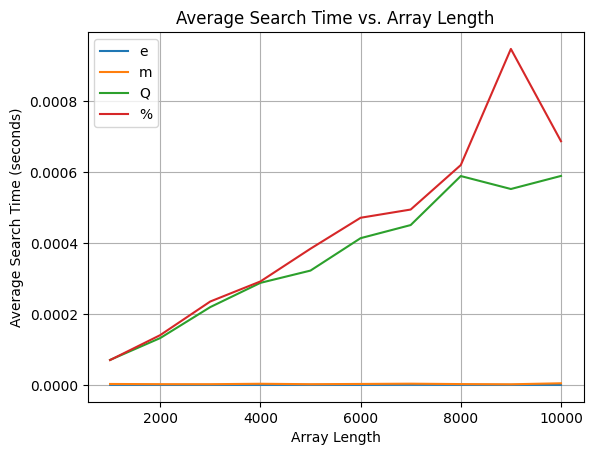

In [ ]:
from bs4 import BeautifulSoup
import requests
import random
import time
import matplotlib.pyplot as plt

# Fetch text from Project Gutenberg with error handling and encoding adjustment
url = "https://www.gutenberg.org/files/1661/1661-h/1661-h.htm"  # The Adventures of Sherlock Holmes

try:
    response = requests.get(url)
    response.encoding = 'utf-8'  # Ensure proper encoding
    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text()
except Exception as e:
    print(f"Error fetching text from {url}: {e}")
    text = ""

# Function to generate arrays of characters from the text
def generate_arrays(text, lengths, num_arrays_per_length):
    arrays = {}
    text_length = len(text)

    for length in lengths:
        if length > text_length:
            print(f"Skipping length {length} because it's larger than the text length.")
            continue
        arrays[length] = []
        for _ in range(num_arrays_per_length):
            start = random.randint(0, text_length - length)
            array = text[start:start + length]
            arrays[length].append(list(array))  # Convert string to character array

    return arrays

# Linear search algorithm: O(n) time complexity in the worst case
def Search(A, K):
    for index in range(len(A)):
        if A[index] == K:
            return index
    return len(A)  # Return n if K is not found

# Function to measure search performance
def measure_time(A, K):
    start = time.perf_counter()  # More precise timing
    Search(A, K)
    end = time.perf_counter()
    return end - start

# Generate arrays
lengths = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
arrays = generate_arrays(text, lengths, 50)

# Characters to search for
characters_to_search = ['e', 'm', 'Q', '%']

# Measure search time for each character and array length
results = {}
for length in lengths:
    results[length] = {}
    for char in characters_to_search:
        total_time = 0
        for array in arrays.get(length, []):  # Ensure arrays exist for this length
            total_time += measure_time(array, char)
        average_time = total_time / 50 if 50 > 0 else 0  # Avoid division by zero
        results[length][char] = average_time

# Output the results
for length in results:
    print(f"Length: {length}")
    for char in characters_to_search:
        print(f"Average time to find '{char}': {results[length][char]:.6f} seconds")

# Plot the results
plot_data = {char: [results[length][char] for length in lengths if length in results] for char in characters_to_search}
for char, times in plot_data.items():
    plt.plot(lengths[:len(times)], times, label=char)

plt.xlabel('Array Length')
plt.ylabel('Average Search Time (seconds)')
plt.title('Average Search Time vs. Array Length')
plt.legend()
plt.grid()
plt.savefig('search_time_plot.png')

# Optional verification function for testing
def verify(array, key):
    return Search(array, key) != len(array)

# Sample verification
A = ['a', 'b', 'c', 'd', 'e']
print("Verification passed for 'c':", verify(A, 'c'))  # Should print True
print("Verification passed for 'z':", verify(A, 'z'))  # Should print False


Deliverable 3

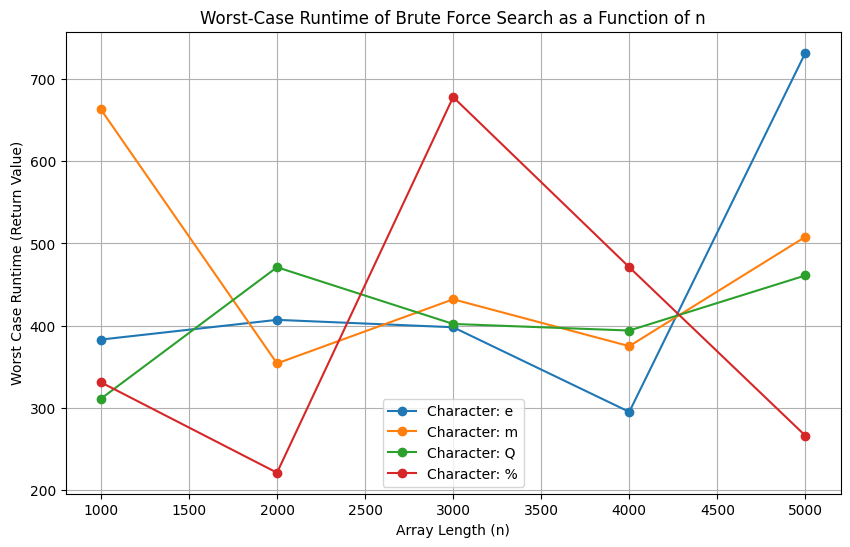

In [ ]:
import random
import string
import matplotlib.pyplot as plt

# Step 1: Search Algorithm (Brute Force)
def Search(A, K):
    for i in range(len(A)):
        if A[i] == K:
            return i
    return len(A)  # return n if K is not found

# Step 2: Function to Generate Random Character Arrays
def generate_random_array(n):
    return [random.choice(string.ascii_letters + string.digits + string.punctuation) for _ in range(n)]

# Step 3: Collect Worst Case Data
def run_experiment(character_set, array_lengths, num_trials):
    worst_case_results = {char: [] for char in character_set}

    for n in array_lengths:
        for char in character_set:
            max_runtime = 0
            for _ in range(num_trials):
                A = generate_random_array(n)

                # Ensure worst-case scenario by adding the character to the last position or not including it
                if random.choice([True, False]):
                    A[-1] = char  # character in the last position (worst case)
                # Run search and capture worst case runtime
                runtime = Search(A, char)
                max_runtime = max(max_runtime, runtime)

            worst_case_results[char].append(max_runtime)

    return worst_case_results

# Step 4: Plot the Results
def plot_results(worst_case_results, array_lengths):
    plt.figure(figsize=(10, 6))

    for char, runtimes in worst_case_results.items():
        plt.plot(array_lengths, runtimes, label=f'Character: {char}', marker='o')

    plt.xlabel('Array Length (n)')
    plt.ylabel('Worst Case Runtime (Return Value)')
    plt.title('Worst-Case Runtime of Brute Force Search as a Function of n')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Define Parameters and Run the Experiment
if __name__ == "__main__":
    character_set = ['e', 'm', 'Q', '%']  # Test characters
    array_lengths = [1000, 2000, 3000, 4000, 5000]  # Array sizes to test
    num_trials = 50  # Number of arrays to generate per array size

    # Run experiment to collect worst-case runtimes
    worst_case_results = run_experiment(character_set, array_lengths, num_trials)

    # Plot the results
    plot_results(worst_case_results, array_lengths)


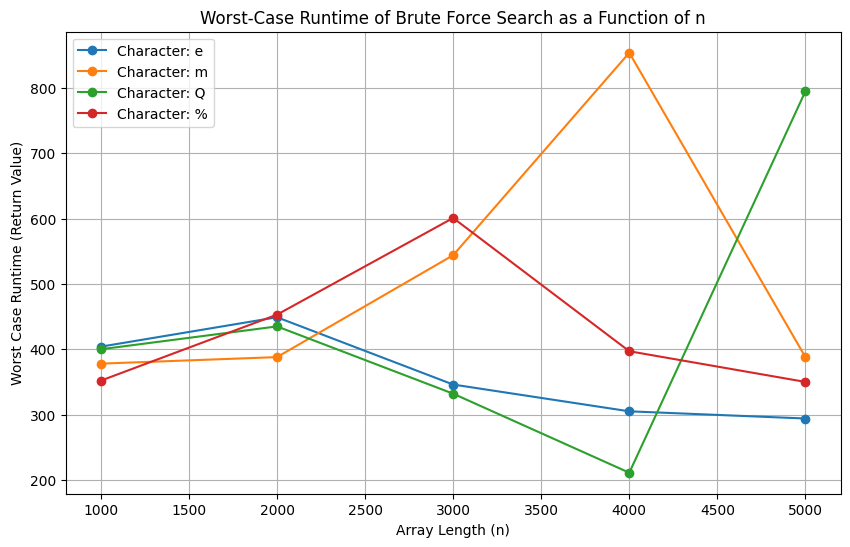

In [ ]:
import random
import string
import matplotlib.pyplot as plt

# Step 1: Search Algorithm (Brute Force)
def Search(A, K):
    for i in range(len(A)):
        if A[i] == K:
            return i  # Return index if found
    return len(A)  # Return n if K is not found

# Step 2: Function to Generate Random Character Arrays
def generate_random_array(n):
    return [random.choice(string.ascii_letters + string.digits + string.punctuation) for _ in range(n)]

# Step 3: Collect Worst Case Data
def run_experiment(character_set, array_lengths, num_trials):
    worst_case_results = {char: [] for char in character_set}

    for n in array_lengths:
        for char in character_set:
            max_runtime = 0
            for _ in range(num_trials):
                A = generate_random_array(n)

                # Ensure worst-case scenario by adding the character to the last position or not including it
                if random.choice([True, False]):
                    A[-1] = char  # character in the last position (worst case)
                # Run search and capture worst case runtime
                runtime = Search(A, char)
                max_runtime = max(max_runtime, runtime)

            worst_case_results[char].append(max_runtime)

    return worst_case_results

# Step 4: Plot the Results
def plot_results(worst_case_results, array_lengths):
    plt.figure(figsize=(10, 6))

    for char, runtimes in worst_case_results.items():
        plt.plot(array_lengths, runtimes, label=f'Character: {char}', marker='o')

    plt.xlabel('Array Length (n)')
    plt.ylabel('Worst Case Runtime (Return Value)')
    plt.title('Worst-Case Runtime of Brute Force Search as a Function of n')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Define Parameters and Run the Experiment
if __name__ == "__main__":
    character_set = ['e', 'm', 'Q', '%']  # Test characters
    array_lengths = [1000, 2000, 3000, 4000, 5000]  # Array sizes to test
    num_trials = 50  # Number of arrays to generate per array size

    # Run experiment to collect worst-case runtimes
    worst_case_results = run_experiment(character_set, array_lengths, num_trials)

    # Plot the results
    plot_results(worst_case_results, array_lengths)


Deliverable 4

Finished processing character: e, Array length: 100
Finished processing character: e, Array length: 200
Finished processing character: e, Array length: 300
Finished processing character: e, Array length: 400
Finished processing character: e, Array length: 500
Finished processing character: e, Array length: 600
Finished processing character: e, Array length: 700
Finished processing character: e, Array length: 800
Finished processing character: e, Array length: 900
Finished processing character: e, Array length: 1000
Finished processing character: m, Array length: 100
Finished processing character: m, Array length: 200
Finished processing character: m, Array length: 300
Finished processing character: m, Array length: 400
Finished processing character: m, Array length: 500
Finished processing character: m, Array length: 600
Finished processing character: m, Array length: 700
Finished processing character: m, Array length: 800
Finished processing character: m, Array length: 900
Finished pr

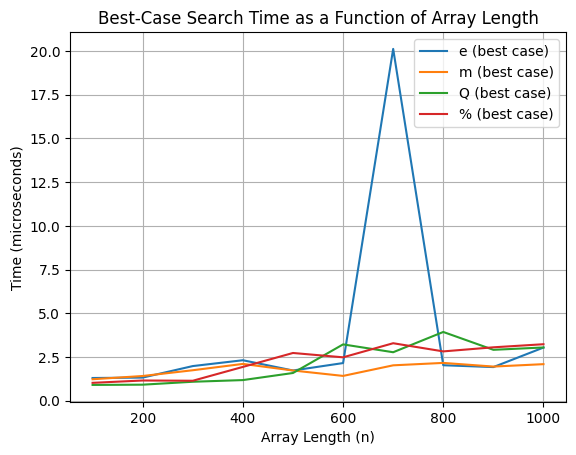

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Brute-force search algorithm
def search(A, K):
    for i in range(len(A)):
        if A[i] == K:
            return i
    return len(A)  # Return length if K is not found

# Function to generate random character arrays
def generate_array(n, include_char=None, pos=None):
    A = [chr(random.randint(32, 126)) for _ in range(n)]  # Random ASCII characters
    if include_char and pos is not None:
        A[pos] = include_char  # Insert the test character at a specific position
    return A

# Function to measure runtime of the search algorithm
def measure_time(A, K):
    start = time.time()
    search(A, K)
    end = time.time()
    return (end - start) * 1e6  # Time in microseconds

# Function to perform the experiment for best-case scenarios
def perform_experiment(test_characters, array_lengths, num_trials):
    results = {'best': {}}

    for char in test_characters:
        best_times = []

        for n in array_lengths:
            best_case_time = 0

            for _ in range(num_trials):
                # Best case: Character at the start
                A = generate_array(n, include_char=char, pos=0)
                time_taken = measure_time(A, char)
                best_case_time += time_taken

            # Average over trials
            best_times.append(best_case_time / num_trials)

            # Print progress for clarity
            print(f'Finished processing character: {char}, Array length: {n}')

        results['best'][char] = best_times

    return results

# Function to plot the results
def plot_results(results, array_lengths):
    for char in results['best']:
        plt.plot(array_lengths, results['best'][char], label=f'{char} (best case)')

    plt.xlabel('Array Length (n)')
    plt.ylabel('Time (microseconds)')
    plt.title('Best-Case Search Time as a Function of Array Length')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to run the experiment and generate plots
def main():
    test_characters = ['e', 'm', 'Q', '%']  # Characters to search for
    array_lengths = list(range(100, 1100, 100))  # Array lengths from 100 to 1000
    num_trials = 50  # Number of trials per array length

    # Perform the experiment and gather runtime data
    results = perform_experiment(test_characters, array_lengths, num_trials)

    # Plot the results
    plot_results(results, array_lengths)

# Run the main function
if __name__ == '__main__':
    main()


Finished processing character: e, Array length: 100
Finished processing character: e, Array length: 200
Finished processing character: e, Array length: 300
Finished processing character: e, Array length: 400
Finished processing character: e, Array length: 500
Finished processing character: e, Array length: 600
Finished processing character: e, Array length: 700
Finished processing character: e, Array length: 800
Finished processing character: e, Array length: 900
Finished processing character: e, Array length: 1000
Finished processing character: m, Array length: 100
Finished processing character: m, Array length: 200
Finished processing character: m, Array length: 300
Finished processing character: m, Array length: 400
Finished processing character: m, Array length: 500
Finished processing character: m, Array length: 600
Finished processing character: m, Array length: 700
Finished processing character: m, Array length: 800
Finished processing character: m, Array length: 900
Finished pr

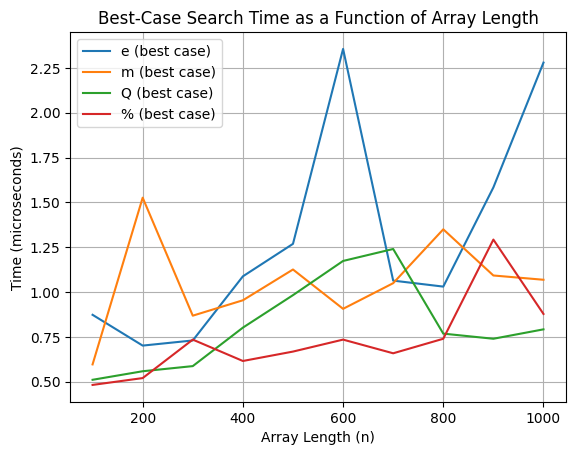

Conjecture: Since this is a brute-force search algorithm and the character is always at the start of the array (best case), the runtime should be close to constant (O(1)).
The plots should show nearly flat lines, regardless of array length.
Character: e
Best-case times: [0.8726119995117188, 0.7009506225585938, 0.7295608520507812, 1.087188720703125, 1.2683868408203125, 2.3555755615234375, 1.0633468627929688, 1.02996826171875, 1.583099365234375, 2.2792816162109375]
Expected behavior: The runtime should remain relatively constant as n increases, as the search terminates at the first position.
Character: m
Best-case times: [0.5960464477539062, 1.52587890625, 0.8678436279296875, 0.95367431640625, 1.125335693359375, 0.9059906005859375, 1.049041748046875, 1.3494491577148438, 1.0919570922851562, 1.068115234375]
Expected behavior: The runtime should remain relatively constant as n increases, as the search terminates at the first position.
Character: Q
Best-case times: [0.5102157592773438, 0.557

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Brute-force search algorithm
def search(A, K):
    for i in range(len(A)):
        if A[i] == K:
            return i
    return len(A)  # Return length if K is not found

# Function to generate random character arrays
def generate_array(n, include_char=None, pos=None):
    A = [chr(random.randint(32, 126)) for _ in range(n)]  # Random ASCII characters
    if include_char and pos is not None:
        A[pos] = include_char  # Insert the test character at a specific position
    return A

# Function to measure runtime of the search algorithm
def measure_time(A, K):
    start = time.time()
    search(A, K)
    end = time.time()
    return (end - start) * 1e6  # Time in microseconds

# Function to perform the experiment for best-case scenarios
def perform_experiment(test_characters, array_lengths, num_trials):
    best_times = {}

    for char in test_characters:
        times_for_char = []

        for n in array_lengths:
            total_time = 0

            for _ in range(num_trials):
                # Best case: Character at the start
                A = generate_array(n, include_char=char, pos=0)
                time_taken = measure_time(A, char)
                total_time += time_taken

            # Average over trials
            avg_time = total_time / num_trials
            times_for_char.append(avg_time)

            # Print progress for clarity
            print(f'Finished processing character: {char}, Array length: {n}')

        best_times[char] = times_for_char

    return best_times

# Function to plot the results
def plot_results(best_times, array_lengths):
    for char in best_times:
        plt.plot(array_lengths, best_times[char], label=f'{char} (best case)')

    plt.xlabel('Array Length (n)')
    plt.ylabel('Time (microseconds)')
    plt.title('Best-Case Search Time as a Function of Array Length')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to analyze and conjecture about the results
def analyze_results(best_times, array_lengths):
    print("Conjecture: Since this is a brute-force search algorithm and the character is always at the start of the array (best case), the runtime should be close to constant (O(1)).")
    print("The plots should show nearly flat lines, regardless of array length.")

    for char in best_times:
        print(f'Character: {char}')
        print(f'Best-case times: {best_times[char]}')
        print('Expected behavior: The runtime should remain relatively constant as n increases, as the search terminates at the first position.')

# Main function to run the experiment and generate plots
def main():
    test_characters = ['e', 'm', 'Q', '%']  # Characters to search for
    array_lengths = list(range(100, 1100, 100))  # Array lengths from 100 to 1000
    num_trials = 50  # Number of trials per array length

    # Perform the experiment and gather runtime data
    best_times = perform_experiment(test_characters, array_lengths, num_trials)

    # Plot the results
    plot_results(best_times, array_lengths)

    # Analyze the results and form a conjecture
    analyze_results(best_times, array_lengths)

# Run the main function
if __name__ == '__main__':
    main()


Deliverable 5

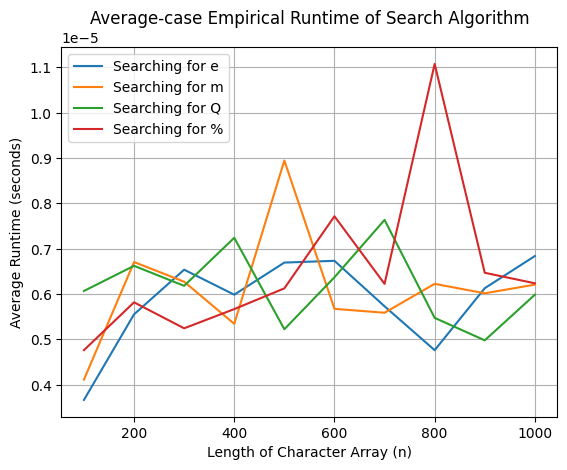


Analysis of Average-case Runtime:
Average runtime for character 'e': [3.6652800463343736e-06, 5.553879927902016e-06, 6.53869995403511e-06, 5.986919968563598e-06, 6.695600031889626e-06, 6.734479993610875e-06, 5.7310599822812945e-06, 4.762839953400544e-06, 6.130140018285602e-06, 6.839599936938612e-06]
Average runtime for character 'm': [4.1134600360237525e-06, 6.707480079057859e-06, 6.273660001170356e-06, 5.343719967640937e-06, 8.946819998527643e-06, 5.675060010617017e-06, 5.588640024143388e-06, 6.226319974302896e-06, 6.017939995217603e-06, 6.2088999675324885e-06]
Average runtime for character 'Q': [6.068920001780498e-06, 6.624019997616415e-06, 6.182059987622779e-06, 7.242759984364966e-06, 5.224359983913018e-06, 6.37156000266259e-06, 7.636760019522625e-06, 5.4758400256105235e-06, 4.979840014129877e-06, 5.986080013826722e-06]
Average runtime for character '%': [4.763539991472499e-06, 5.818619965793914e-06, 5.245380079941242e-06, 5.669360025422065e-06, 6.126519983808976e-06, 7.71737998547

In [ ]:
import random
import string
import time
import matplotlib.pyplot as plt

# Step 1: Brute-force Search Algorithm
def search(A, K):
    for index in range(len(A)):
        if A[index] == K:
            return index  # Return the first index where K is found
    return len(A)  # Return n if K is not found

# Step 2: Generate Character Array
def generate_character_array(length, chars_to_include):
    # Fill the array with random characters, including some of the characters we want to search for
    array = [random.choice(string.ascii_letters + string.punctuation) for _ in range(length)]
    # Ensure at least one of the chars_to_include is in the array
    if random.choice([True, False]):
        array[random.randint(0, length - 1)] = random.choice(chars_to_include)
    return array

# Step 3: Measure Execution Time
def measure_runtime(lengths, chars_to_search, iterations=50):
    results = {char: [] for char in chars_to_search}
    for length in lengths:
        for char in chars_to_search:
            total_time = 0
            for _ in range(iterations):
                A = generate_character_array(length, chars_to_search)
                start_time = time.perf_counter()
                search(A, char)
                end_time = time.perf_counter()
                total_time += (end_time - start_time)
            average_time = total_time / iterations
            results[char].append(average_time)
    return results

# Step 4: Create the Plot
def plot_results(results, lengths):
    for char, times in results.items():
        plt.plot(lengths, times, label=f'Searching for {char}')

    plt.xlabel('Length of Character Array (n)')
    plt.ylabel('Average Runtime (seconds)')
    plt.title('Average-case Empirical Runtime of Search Algorithm')
    plt.legend()
    plt.grid()
    plt.show()

# Step 5: Analyze and Conjecture
def analyze_results(results):
    print("\nAnalysis of Average-case Runtime:")
    for char, times in results.items():
        print(f"Average runtime for character '{char}': {times}")

    # Discussing the theoretical complexities
    print("\nTheoretical Complexity Analysis:")
    print("1. Best Case: O(1) - The search key K is at the first index of the array.")
    print("2. Worst Case: O(n) - The search key K is either not present or at the last index.")
    print("3. Average Case: O(n) - On average, the search will traverse about half the array.")

# Step 6: Execute Everything
if __name__ == "__main__":
    # Parameters
    lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    chars_to_search = ['e', 'm', 'Q', '%']
    iterations = 50

    # Measure runtime
    results = measure_runtime(lengths, chars_to_search, iterations)

    # Plot results
    plot_results(results, lengths)

    # Analyze results and print conjectures
    analyze_results(results)


Finished processing character: e, Array length: 100
Finished processing character: e, Array length: 200
Finished processing character: e, Array length: 300
Finished processing character: e, Array length: 400
Finished processing character: e, Array length: 500
Finished processing character: e, Array length: 600
Finished processing character: e, Array length: 700
Finished processing character: e, Array length: 800
Finished processing character: e, Array length: 900
Finished processing character: e, Array length: 1000
Finished processing character: m, Array length: 100
Finished processing character: m, Array length: 200
Finished processing character: m, Array length: 300
Finished processing character: m, Array length: 400
Finished processing character: m, Array length: 500
Finished processing character: m, Array length: 600
Finished processing character: m, Array length: 700
Finished processing character: m, Array length: 800
Finished processing character: m, Array length: 900
Finished pr

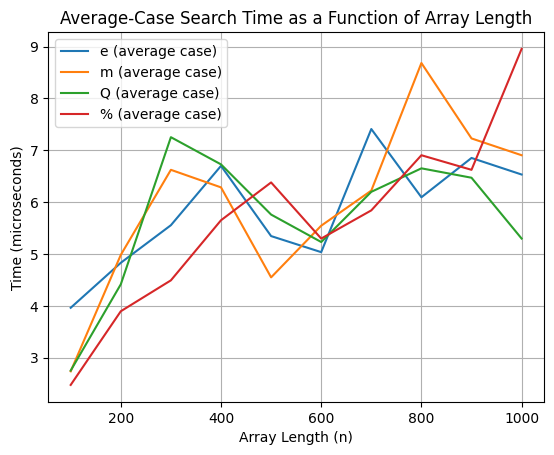

Conjecture: Since this is a brute-force search algorithm, the average-case runtime should be linear (O(n)).
The plots should show an increasing trend as the array length increases.
Character: e
Average-case times: [3.9625167846679688, 4.830360412597656, 5.555152893066406, 6.699562072753906, 5.345344543457031, 5.035400390625, 7.4100494384765625, 6.0939788818359375, 6.852149963378906, 6.5326690673828125]
Expected behavior: The runtime should increase linearly with n as the search might need to traverse a significant portion of the array.
Character: m
Average-case times: [2.7370452880859375, 4.982948303222656, 6.623268127441406, 6.2847137451171875, 4.5490264892578125, 5.545616149902344, 6.222724914550781, 8.683204650878906, 7.228851318359375, 6.90460205078125]
Expected behavior: The runtime should increase linearly with n as the search might need to traverse a significant portion of the array.
Character: Q
Average-case times: [2.7513504028320312, 4.4155120849609375, 7.252693176269531, 6.7

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Brute-force search algorithm
def search(A, K):
    for i in range(len(A)):
        if A[i] == K:
            return i
    return len(A)  # Return length if K is not found

# Function to generate random character arrays
def generate_array(n, include_char=None, pos=None):
    A = [chr(random.randint(32, 126)) for _ in range(n)]  # Random ASCII characters
    if include_char:
        if pos is None:
            pos = random.randint(0, n-1)  # Random position for average case
        A[pos] = include_char  # Insert the test character
    return A

# Function to measure runtime of the search algorithm
def measure_time(A, K):
    start = time.time()
    search(A, K)
    end = time.time()
    return (end - start) * 1e6  # Time in microseconds

# Function to perform the experiment for average-case scenarios
def perform_experiment(test_characters, array_lengths, num_trials):
    avg_times = {}

    for char in test_characters:
        times_for_char = []

        for n in array_lengths:
            total_time = 0

            for _ in range(num_trials):
                # Average case: Character placed randomly in the array
                A = generate_array(n, include_char=char)
                time_taken = measure_time(A, char)
                total_time += time_taken

            # Average over trials
            avg_time = total_time / num_trials
            times_for_char.append(avg_time)

            # Print progress for clarity
            print(f'Finished processing character: {char}, Array length: {n}')

        avg_times[char] = times_for_char

    return avg_times

# Function to plot the results
def plot_results(avg_times, array_lengths):
    for char in avg_times:
        plt.plot(array_lengths, avg_times[char], label=f'{char} (average case)')

    plt.xlabel('Array Length (n)')
    plt.ylabel('Time (microseconds)')
    plt.title('Average-Case Search Time as a Function of Array Length')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to analyze and conjecture about the results
def analyze_results(avg_times, array_lengths):
    print("Conjecture: Since this is a brute-force search algorithm, the average-case runtime should be linear (O(n)).")
    print("The plots should show an increasing trend as the array length increases.")

    for char in avg_times:
        print(f'Character: {char}')
        print(f'Average-case times: {avg_times[char]}')
        print('Expected behavior: The runtime should increase linearly with n as the search might need to traverse a significant portion of the array.')

# Main function to run the experiment and generate plots
def main():
    test_characters = ['e', 'm', 'Q', '%']  # Characters to search for
    array_lengths = list(range(100, 1100, 100))  # Array lengths from 100 to 1000
    num_trials = 50  # Number of trials per array length

    # Perform the experiment and gather runtime data
    avg_times = perform_experiment(test_characters, array_lengths, num_trials)

    # Plot the results
    plot_results(avg_times, array_lengths)

    # Analyze the results and form a conjecture
    analyze_results(avg_times, array_lengths)

# Run the main function
if __name__ == '__main__':
    main()
